# Inaugural Project

Imports and set magics: 


In [27]:
import numpy as np
## autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import itertools as it
import scipy
from scipy import optimize 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [28]:
# We define the variables, where we set w=1, in order to try the code.
m = 1
v = 10
epsilon = 0.3
tau_0 = 0.4
tau_1 = 0.1
kappa = 0.4
w = 1

# We define the utility function for the consumer:
def utility(c,l,v,epsilon):
    u = np.log(c) - v*(l**(1+(1/epsilon))/(1+(1/epsilon)))
    return u

# We define the constraint
def constraint(m,w,l,tau_0,tau_1,kappa):
    x = m + w*l - (tau_0*w*l + tau_1*max(w*l-kappa,0))
    return x

# We define the consumption choice as a function of the constraint
def choice(l,w,epsilon,v,tau_0,tau_1,kappa,m):
    c = constraint(m,w,l,tau_0,tau_1,kappa)
    return -utility(c,l,v,epsilon)

# We define the function in order to determine the laboursupply and consumption optimizing output
def optimizer(w,epsilon,v,tau_0,tau_1,kappa,m,do_print=False):
    result = optimize.minimize_scalar(choice, method='bounded',bounds=(0,1), args=(w,epsilon,v,tau_0,tau_1,kappa,m))
    
    l_opt = result.x
    c_opt = constraint(m,w,l_opt,tau_0,tau_1,kappa)
    u_opt = utility(c_opt,l_opt,v,epsilon)
    
    if do_print:
        print(f'l_opt = {l_opt:3f}')
        print(f'c_opt = {c_opt:3f}')
        print(f'u_opt = {u_opt:3f}')
    return l_opt,c_opt,u_opt

# Question 2

In [29]:
#We run the optimization with w=1 to find the average parameters.
optimizer(w,epsilon,v,tau_0,tau_1,kappa,m,do_print=True)

l_opt = 0.400001
c_opt = 1.240000
u_opt = 0.171583


(0.4000006819648219, 1.240000340982411, 0.17158308392555602)

In [30]:
l_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[0]
print(l_opt)
c_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[1]
print(c_opt)
u_opt=optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)[2]
print(u_opt)

0.4000006819648219
1.240000340982411
0.17158308392555602


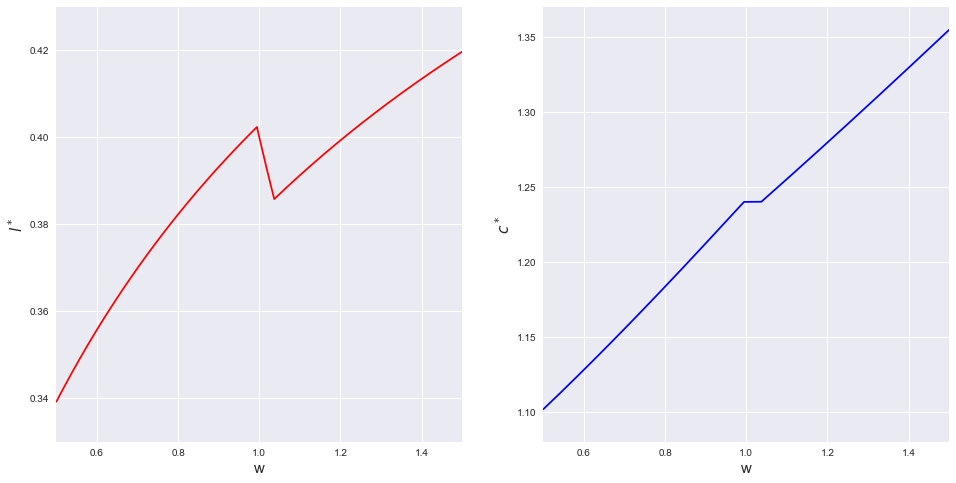

In [31]:
#We set the population to 10.000:
N=10000
#We create a vector for all values between 0.5-1.5 for the 10.0000 people:
w_vec = np.linspace(0.5, 1.5, N)
#Then we create to empty vectors for l and c in the same size:
l_vec = np.empty(N)
c_vec = np.empty(N)
#Then we run our optimizer code with the different w

for i,w in enumerate(w_vec) :
    bundle = optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

fig = plt.figure(figsize=(16,8))
ax=ax = fig.add_subplot(1,2,1)
ax.plot(w_vec, l_vec, color='red')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$l^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([0.33,0.43])
ax.grid(True)

ax=ax = fig.add_subplot(1,2,2)
ax.plot(w_vec, c_vec, color='blue')
ax.set_xlabel('w',size=15)
ax.set_ylabel('$c^*$', size=15)
ax.set_xlim([0.5,1.5])
ax.set_ylim([1.08,1.37])
ax.grid(True)

We notice that optimal supply of labor and consumption are positive functions of the wage. So a higher wages lead to higher consumption and higher supply of consumption. We can conclude that the substitution effect dominates the income effect in the labor market. Furthermore the discontinous jumps in both of the plots are when the max function takes the first input instead of the second, so when the consumer goes from the standard labor income tax, to the top bracket and now has to pay top bracket labor income tax. 

# Question 3

In [32]:
#Her er funktionen for tax revenu:
def Tax_revenue(epsilon,v,tau_0,tau_1,kappa,m,N):
    np.random.seed(1032)
    wi_vec1 = np.random.uniform(0.5,1.5,size=N)
    l_vec1 = np.empty(N)
    for i,w in enumerate(wi_vec1) :
        OPT = optimizer(w,epsilon,v,tau_0,tau_1,kappa,m)
        l_vec1[i]=OPT[0]

    total_tax = lambda l_vec1,wi_vec1: tau_0*wi_vec1*l_vec1+tau_1*np.max(wi_vec1*l_vec1-kappa,0)
    tax=total_tax(l_vec1,wi_vec1)
    return np.sum(tax)

In [33]:
print(f'The total tax revenue is: {Tax_revenue(epsilon,v,tau_0,tau_1,kappa,m,N):4f}')

The total tax revenue is: 1805.083775


# Question 4

In [34]:
epsilon1=0.1
print(f'The total tax revenue is: {Tax_revenue(epsilon1,v,tau_0,tau_1,kappa,m,N):4f}')

The total tax revenue is: 3577.386883


The tax revenue increases due to $\epsilon$ being the elasticity of labour supply. When epsilon is lowered we get more labour supply which results in higher tax revenue.

# Question 5

In [56]:
N1=10000 # We set the number to 1000 in order to keep the loading time lower:
# We define the function to optimize tax_revenu
def Tax_Revenue_Optimizer(x):
    tau_0=x[0]
    tau_1=x[1]
    kappa=x[2]
    return -Tax_revenue(epsilon,v,tau_0,tau_1,kappa,m,N1)

# We set the bounds and start with the given parameter values
Bounds_Tax_Revenue=((0,1),(0,1),(0,1.5))
Guess =[0.4,0.4,0.2]

# We use the solver to maximize tax revenu given the three parameters
Result_Tax_Revenue_Optimizer = optimize.minimize(Tax_Revenue_Optimizer, Guess, method='SLSQP',bounds=Bounds_Tax_Revenu)

# We find the optimal parameters 
tau_0_opt=Result_Tax_Revenue_Optimizer.x[0]
tau_1_opt=Result_Tax_Revenue_Optimizer.x[1]
kappa_opt=Result_Tax_Revenue_Optimizer.x[2]

# We print the parameters and the tax revenu
print(f'Optimal tau_0 is {tau_0_opt:.3f}')
print(f'Optimal tau_1 is {tau_1_opt:.3f}')
print(f'Optimal kappa is {kappa_opt:.3f}')
print(f'This gives us the expected tax revenue for N1 people: {Tax_revenue(epsilon,v,tau_0_opt,tau_1_opt,kappa_opt,m,N1):.3f}, which is significantly higher than the tax revenue of 1805 in 3)')
# Note this code takes a few mintues to run. 

Optimal tau_0 is 0.000
Optimal tau_1 is 0.792
Optimal kappa is 0.000
This gives us the expected tax revenue for N1 people: 4072.007, which is significantly higher than the tax revenue of 1805 in 3)


Which to be fair some how seems like a bad way of maximizing the tax revenue, even though it is higher than in question 3. Since only taxing the top bracket labor income and then taxing almost 80 percent, seems very unrealistic and not as a good solution in the real world. It would probably just make the top bracket to move, seek tax evasion or work less. But if the only objective for the politcian is to maximize tax revenue then ceterius paribus our model suggests that the way to do so is to set $\tau_1$ equal to 79,2 percent. 
Although, with $\kappa$ equal to zero in the expression $\tau_0$ and tau1 have exactly the same effect on consumption, therefore it would be the same to set tau0 equal to 79,2 percent, which is a more plausible solution. So our recommendation to the politician is to set the top labor income taxes to zero, set the standard labor tax to 79,2 percent and to set the cut-off for the top labor income bracker equal to zero.  

# Conclusion

In our project we created a code which is able to solve the Labor-Supply Problem, whereas it optimizes the specified maximization problem. The optimal choices of labor and consumption are found and plotted in two graphs. These optimal choices are used to calculating the tax revenue for a given population with the specified functions and for individuals solving the optimization problem. The effect of a change in the Firsch elasticity of labor supply have significantly impact on the tax revenue. Finally the tax revenue is maximized yielding the optimal choices of values for the standar labor income and top bracket labor income tax and the cut-off for the top labor income bracket. 
 